# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [297]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import*
init_printing()

## Se crean variables simbólicas

In [298]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [299]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [300]:
_0H1

⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [301]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [302]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [303]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [304]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [305]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [306]:
_3H4

⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [307]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [308]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [309]:
P = H[0:2, 3]

In [310]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [311]:
# Matriz homogénea de rotación para theta1
H_z_theta1 = Matrix([
    [cos(theta_1), -sin(theta_1), 0, 0],
    [sin(theta_1), cos(theta_1), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

H_z_theta1

⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

In [312]:
# Matriz homogénea de rotación para theta2
H_z_theta2 = Matrix([
    [cos(theta_2), -sin(theta_2), 0, 0],
    [sin(theta_2), cos(theta_2), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
H_z_theta2

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

In [313]:
def obtener_posicion_y_rotacion(H):
    """
    Extrae la posición y el ángulo de rotación de una matriz de transformación homogénea.

    Esta función toma una matriz homogénea 4x4, que contiene la información de la posición y la
    orientación de un brazo robótico (o cualquier otro sistema en 2D). La matriz debe ser de la

    Donde (x, y) son las coordenadas del extremo del brazo y (a11, a21) son elementos de la
    submatriz de rotación 2x2 que representan la orientación del brazo.

    Parámetros:
    H (numpy.ndarray): Matriz homogénea 4x4 que representa la transformación del brazo.

    Retorna:
    tuple: Una tupla con tres valores:
        - x (float): La coordenada x del extremo del brazo.
        - y (float): La coordenada y del extremo del brazo.
        - theta_deg (float): El ángulo de rotación en grados.
    """
    # Extraer las coordenadas x y y del extremo del brazo
    x = H[0, 3]
    y = H[1, 3]

    # Extraer la submatriz de rotación (2x2) de la matriz homogénea
    a11 = H[0, 0]
    a21 = H[1, 0]

    # Calcular el ángulo de rotación usando atan2
    theta = math.atan2(a21, a11)

    # Convertir el ángulo a grados (si lo prefieres en grados)
    theta_deg = math.degrees(theta)

    # Devolver la posición y el ángulo de rotación
    return x, y, theta_deg


# **Se ajusto la funcion para que dibujara tambien el punto nuevo donde se va a mover el brazo y ademas se ajusto para que en caso no reciba un parametro tome el valor anterior.**

In [314]:
# Variables globales para almacenar el estado del brazo mecánico y del punto
estado_brazo = {"theta1": None, "theta2": None, "l1": None, "l2": None, "x_random": None, "y_random": None}

def dibujar_brazo_mecanico(theta1=None, theta2=None, l1=None, l2=None, x_random=None, y_random=None, H_evaluada=None):
    """
    Dibuja el brazo mecánico 2D con los parámetros dados o los valores almacenados en el estado global.

    Esta función dibuja un brazo robótico de dos articulaciones basado en los ángulos y longitudes de los segmentos.
    También puede mostrar un punto de referencia y, opcionalmente, la orientación final del brazo si se proporciona
    la matriz de transformación homogénea H_evaluada.

    Parámetros:
    theta1 (float, opcional): Ángulo de la primera articulación en radianes. Si no se proporciona, se usa el valor almacenado en el estado.
    theta2 (float, opcional): Ángulo de la segunda articulación en radianes. Si no se proporciona, se usa el valor almacenado en el estado.
    l1 (float, opcional): Longitud del primer brazo. Si no se proporciona, se usa el valor almacenado en el estado.
    l2 (float, opcional): Longitud del segundo brazo. Si no se proporciona, se usa el valor almacenado en el estado.
    x_random (float, opcional): Coordenada X del punto de referencia a dibujar. Si no se proporciona, se usa el valor almacenado en el estado.
    y_random (float, opcional): Coordenada Y del punto de referencia a dibujar. Si no se proporciona, se usa el valor almacenado en el estado.
    H_evaluada (numpy.ndarray, opcional): Matriz de transformación homogénea 4x4 para obtener la orientación del brazo.

    Retorna:
    None: La función dibuja la representación gráfica del brazo en su estado actual.

    """
    global estado_brazo

    # Si se pasan nuevos valores, actualizamos el estado
    if theta1 is not None:
        estado_brazo["theta1"] = theta1
    if theta2 is not None:
        estado_brazo["theta2"] = theta2
    if l1 is not None:
        estado_brazo["l1"] = l1
    if l2 is not None:
        estado_brazo["l2"] = l2
    if x_random is not None:
        estado_brazo["x_random"] = x_random
    if y_random is not None:
        estado_brazo["y_random"] = y_random

    # Verificamos que los valores necesarios existan
    if None in [estado_brazo["theta1"], estado_brazo["theta2"], estado_brazo["l1"], estado_brazo["l2"], estado_brazo["x_random"], estado_brazo["y_random"]]:
        print("Faltan valores iniciales. Por favor proporciónalos todos en la primera llamada.")
        return

    # Usamos los valores almacenados
    theta1 = estado_brazo["theta1"]
    theta2 = estado_brazo["theta2"]
    l1 = estado_brazo["l1"]
    l2 = estado_brazo["l2"]
    x_random = estado_brazo["x_random"]
    y_random = estado_brazo["y_random"]

    # Calculamos la posición del efector final
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujando el brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # Primer enlace
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Segundo enlace
    plt.plot(0, 0, 'ro', markersize=10)  # Base
    plt.plot(x2, y2, 'go', markersize=10)  # Efector final

    # Dibujar el punto
    plt.plot(x_random, y_random, 'mo', markersize=10, label="Punto de referencia")

    # Si se pasa la matriz H_evaluada, dibujar la orientación
    if H_evaluada is not None:
        theta_final = np.arctan2(H_evaluada[1, 0], H_evaluada[0, 0])  # Ángulo de rotación
        arrow_length = 0.5
        dx = arrow_length * np.cos(theta_final)
        dy = arrow_length * np.sin(theta_final)
        plt.quiver(x2, y2, dx, dy, angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='Orientación')

    # Configuraciones del gráfico
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Brazo Mecánico 2")
    plt.grid(True)
    plt.legend()
    plt.show()

In [315]:
def calcular_movimiento_brazo(x_objetivo, y_objetivo, l1, l2, theta1_actual, theta2_actual):
    """
    Calcula los nuevos ángulos de las articulaciones de un brazo robótico para alcanzar un objetivo 2D.

    Utiliza el método de la ley de cosenos para calcular los ángulos necesarios de las articulaciones
    para que el efector final del brazo alcance el punto objetivo (x_objetivo, y_objetivo).

    Parámetros:
    x_objetivo (float): Coordenada X del objetivo que se quiere alcanzar.
    y_objetivo (float): Coordenada Y del objetivo que se quiere alcanzar.
    l1 (float): Longitud del primer brazo del manipulador.
    l2 (float): Longitud del segundo brazo del manipulador.
    theta1_actual (float): Ángulo actual de la primera articulación en grados.
    theta2_actual (float): Ángulo actual de la segunda articulación en grados.

    Retorna:
    dict: Un diccionario con los nuevos ángulos de las articulaciones en grados:
          'theta1_nuevo': Ángulo de la primera articulación en grados.
          'theta2_nuevo': Ángulo de la segunda articulación en grados.

    Excepción:
    Lanza un ValueError si el objetivo está fuera del alcance del brazo.
    """

    # Calcular la distancia al objetivo (distancia euclidiana entre el origen y el objetivo)
    distancia_objetivo = np.hypot(x_objetivo, y_objetivo)

    # Verificar si el objetivo está dentro del alcance del brazo (la distancia no puede ser mayor que la suma de los brazos ni menor que la diferencia)
    if distancia_objetivo > (l1 + l2) or distancia_objetivo < abs(l1 - l2):
        raise ValueError("El punto objetivo está fuera del alcance del brazo.")

    # Ley de cosenos para calcular el ángulo de la segunda articulación (theta2)
    cos_theta2 = (x_objetivo**2 + y_objetivo**2 - l1**2 - l2**2) / (2 * l1 * l2)
    theta2_nuevo = np.arccos(np.clip(cos_theta2, -1.0, 1.0))  # Aplicar un 'clipping' por seguridad para evitar valores fuera del rango válido de arccos

    # Calcular el ángulo de la primera articulación (theta1) utilizando el ángulo calculado de la segunda articulación (theta2)
    k1 = l1 + l2 * np.cos(theta2_nuevo)
    k2 = l2 * np.sin(theta2_nuevo)

    # Ángulo de la primera articulación, calculado con la función arctan2
    theta1_nuevo = np.arctan2(y_objetivo, x_objetivo) - np.arctan2(k2, k1)

    # Convertir los resultados de radianes a grados
    theta1_nuevo_grados = np.degrees(theta1_nuevo)
    theta2_nuevo_grados = np.degrees(theta2_nuevo)

    # Retornar los resultados como un diccionario con los nuevos ángulos en grados
    return {
        'theta1_nuevo': theta1_nuevo_grados,
        'theta2_nuevo': theta2_nuevo_grados,
    }


## Ejemplo de manipulación del brazo robotico en su estado final

# **Se le pasa el punto nuevo, de referencia por parametros**

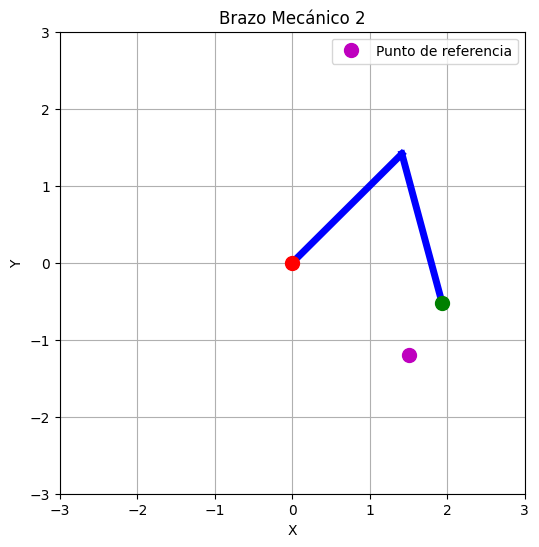

In [316]:
theta1_valor = np.radians (45)
theta2_valor = np.radians(-120)
x_objetivo = 1.5
y_objetivo = -1.2

l1_valor = 2
l2_valor = 2
dibujar_brazo_mecanico(theta1_valor, theta2_valor, l1_valor, l2_valor, x_objetivo, y_objetivo)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

# **EXPERIMENTO 1**

**Usamos el vector la matriz homogenea que nos permite obtener la posicion final del brazo robotico y la rotacion de este mismo.**

In [317]:
H_evaluada = np.array(H.subs({theta_1: theta1_valor, theta_2: theta2_valor, l_1: l1_valor, l_2: l2_valor})).astype(np.float64)

# Llamar a la función
x_inicial, y_inicial, angulo = obtener_posicion_y_rotacion(H_evaluada)

# Mostrar resultados
print(H_evaluada)
print(f"Posición final: x = {x_inicial}, y = {y_inicial}")
print(f"Ángulo de rotación: {angulo} grados")

[[ 0.25881905  0.96592583  0.          1.93185165]
 [-0.96592583  0.25881905  0.         -0.51763809]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
Posición final: x = 1.931851652578137, y = -0.5176380902050415
Ángulo de rotación: -74.99999999999999 grados


In [318]:
resultados = calcular_movimiento_brazo(x_objetivo, y_objetivo, l1_valor, l2_valor, theta1_valor, theta2_valor)

print(f"Nuevo theta1: {resultados['theta1_nuevo']:.2f} grados")
print(f"Nuevo theta2: {resultados['theta2_nuevo']:.2f} grados")

new_theta1 = np.radians(resultados['theta1_nuevo'])
new_theta2 = np.radians(resultados['theta2_nuevo'])

Nuevo theta1: -99.96 grados
Nuevo theta2: 122.60 grados


Ubicacion inicial del brazo


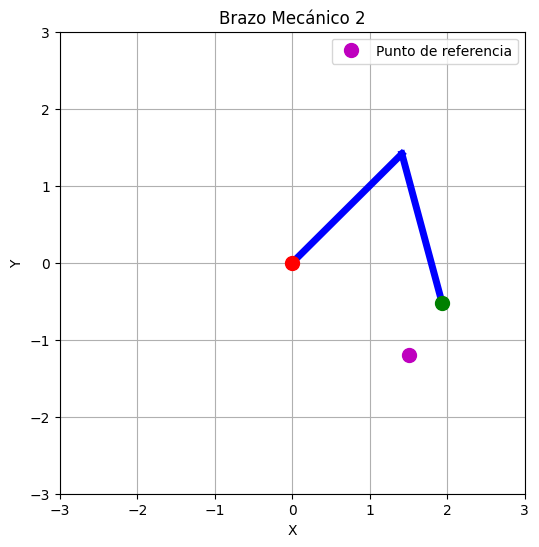

Ubicacion Final del brazo


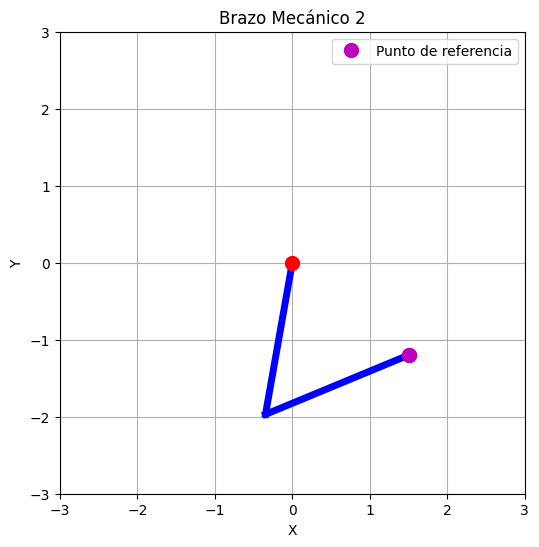

In [319]:
# Llamamos a la función para dibujar el movimiento del brazo
print ("Ubicacion inicial del brazo")
dibujar_brazo_mecanico(theta1_valor, theta2_valor, l1_valor, l2_valor)
print ("Ubicacion Final del brazo")
dibujar_brazo_mecanico(new_theta1, new_theta2, l1_valor, l2_valor)

In [320]:
H_evaluada = np.array(H.subs({theta_1: new_theta1, theta_2: new_theta2, l_1: l1_valor, l_2: l2_valor})).astype(np.float64)

# Llamar a la función
x, y, angulo = obtener_posicion_y_rotacion(H_evaluada)

# Mostrar resultados
print(H_evaluada)
print(f"Posición final: x = {x}, y = {y}")
print(f"Ángulo de rotación: {angulo} grados")

[[ 0.92294516 -0.38493145  0.          1.5       ]
 [ 0.38493145  0.92294516  0.         -1.2       ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
Posición final: x = 1.5000000000000002, y = -1.2000000000000002
Ángulo de rotación: 22.63948495002465 grados


# **EXPERIMENTO 2**

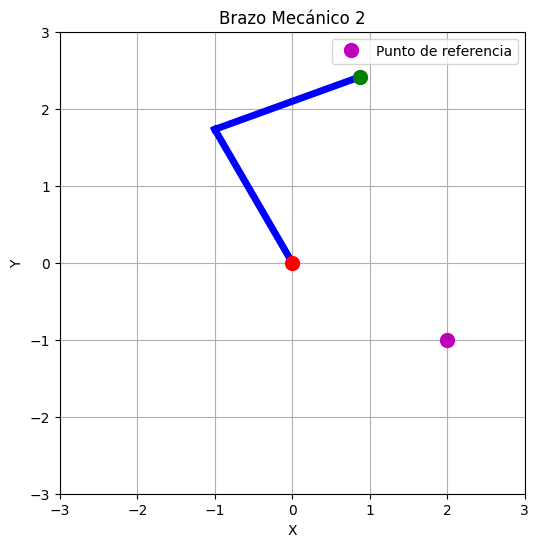

In [326]:
theta1_valor = np.radians (120)
theta2_valor = np.radians(-100)
x_objetivo = 2
y_objetivo = -1

l1_valor = 2
l2_valor = 2

dibujar_brazo_mecanico(theta1_valor, theta2_valor, l1_valor, l2_valor, x_objetivo, y_objetivo)

In [327]:
H_evaluada = np.array(H.subs({theta_1: theta1_valor, theta_2: theta2_valor, l_1: l1_valor, l_2: l2_valor})).astype(np.float64)

# Llamar a la función
x_inicial, y_inicial, angulo = obtener_posicion_y_rotacion(H_evaluada)

# Mostrar resultados
print(H_evaluada)
print(f"Posición final: x = {x_inicial}, y = {y_inicial}")
print(f"Ángulo de rotación: {angulo} grados")

[[ 0.93969262 -0.34202014  0.          0.87938524]
 [ 0.34202014  0.93969262  0.          2.41609109]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
Posición final: x = 0.8793852415718173, y = 2.4160910942202145
Ángulo de rotación: 19.99999999999999 grados


In [328]:
resultados = calcular_movimiento_brazo(x_objetivo, y_objetivo, l1_valor, l2_valor, theta1_valor, theta2_valor)

print(f"Nuevo theta1: {resultados['theta1_nuevo']:.2f} grados")
print(f"Nuevo theta2: {resultados['theta2_nuevo']:.2f} grados")

new_theta1 = np.radians(resultados['theta1_nuevo'])
new_theta2 = np.radians(resultados['theta2_nuevo'])

Nuevo theta1: -82.58 grados
Nuevo theta2: 112.02 grados


Ubicacion inicial del brazo


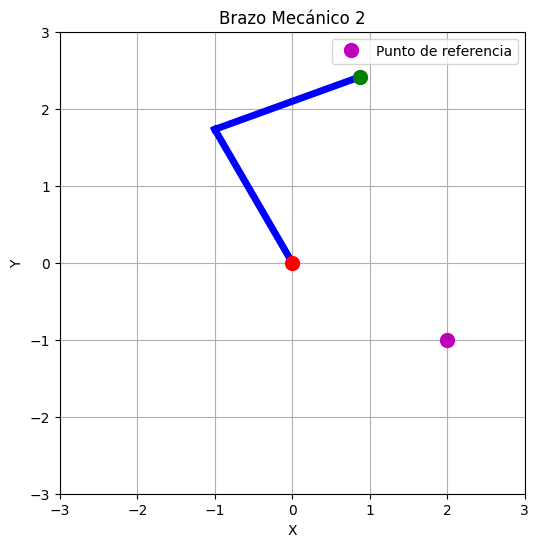

Ubicacion Final del brazo


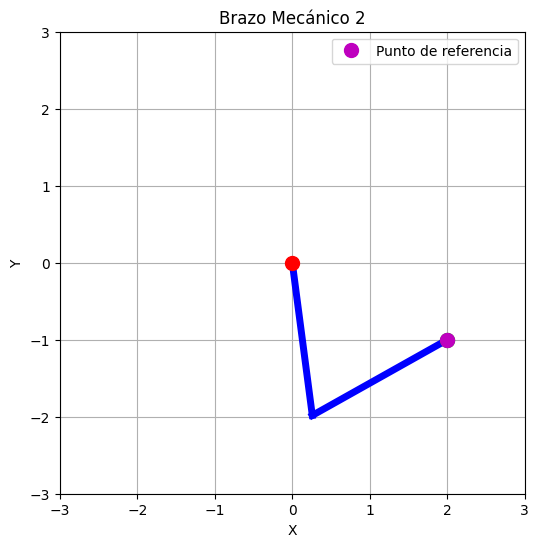

In [329]:
# Llamamos a la función para dibujar el movimiento del brazo
print ("Ubicacion inicial del brazo")
dibujar_brazo_mecanico(theta1_valor, theta2_valor, l1_valor, l2_valor)
print ("Ubicacion Final del brazo")
dibujar_brazo_mecanico(new_theta1, new_theta2, l1_valor, l2_valor)

**Conclusión**

**En un sistema 2x2 y en el un brazo robotico con dos extremidades, pusimos de manera alazar puntos dentro de este mismo y ubicamos el final de la mano del robot en ese punto. Como imaginamos inicialmente hemos visto que sin importar donde ubiquemos el punto, el brazo proda llegar hasta el.**